# Sparse Hamiltonian

SELECT and PREPARE for the second quantized sparse chemistry Hamiltonian.

Starting from the traditional second quantized chemistry Hamiltonian
$$
H = \sum_\sigma \sum_{pq} T_{pq} a_{p\sigma}^\dagger a_{q\sigma}
+
\frac{1}{2}\sum_{\alpha\beta}
\sum_{pqrs}
V_{pqrs} a_{p\sigma}^\dagger a_{r\beta}^\dagger a_{s\beta} a_{q\alpha},
$$
where $a_{p\sigma}$ ($a_{q\sigma}^\dagger$) annihilate (create) an electron in the
$p$-th orbital of spin $\sigma$. 
We can rewrite this expression using the Jordan-Wigner transformation as
$$
H = T' + V',
$$
where
$$
T' = \frac{1}{2} \sum_\sigma \sum_{pq} T_{pq}'Q_{pq\sigma},
$$
$$
V' = \sum_{\alpha\beta}\sum_{pqrs}V_{pqrs}Q_{pq\alpha}Q_{rs\beta},
$$
and $V = (pq|rs)$ are the usual two-electron integrals in chemist's notation,
$$
T'_{pq} = T_{pq} - \sum_r V_{pqrr},
$$
and
$$
Q_{pq\sigma} =
\begin{cases}
X_{p\sigma}\vec{Z}X_{q\sigma} & p < q \\
Y_{p\sigma}\vec{Z}Y_{q\sigma} & p > q \\
-Z_{p\sigma} & p = q
\end{cases}.
$$
The sparse Hamiltonian simply sets to zero any term in the Hamiltonian where
$|V_{pqrs}|$ is less than some threshold. This reduces the
amount of data that is required to be loaded during state preparation as only
non-zero symmetry inequivalent terms are required (the two electron integrals
exhibit 8-fold permutational symmetry). Symmetries are restored by initially
appropriately weighting these non-zero terms and then using $|+\rangle$ states
to perform control swaps between the $pqrs$ registers. 

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran.drawing import show_bloq
from typing import *
import numpy as np

## `SelectSparse`
SELECT oracle for the sparse Hamiltonian.

Implements the two applications of Fig. 13.

#### Parameters
 - `num_spin_orb`: The number of spin orbitals. Typically called N.
 - `num_controls`: The number of controls. 

#### Registers
 - `flag_1b`: a single qubit to flag whether the one-body Hamiltonian is to be applied or not during SELECT.
 - `swap_pq`: a |+> state to restore the symmetries of the p and q indices.
 - `swap_rs`: a |+> state to restore the symmetries of the r and s indices.
 - `swap_pqrs`: a |+> state to restore the symmetries of between (pq) and (rs).
 - `theta`: sign qubit.
 - `pqrs`: the register to store the spatial orbital index.
 - `alpha`: spin for (pq) indicies.
 - `beta`: spin for (rs) indicies. 

Refererences:
    [Even More Efficient Quantum Computations of Chemistry Through Tensor
        hypercontraction](https://arxiv.org/abs/2011.03494) Fig 13.

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


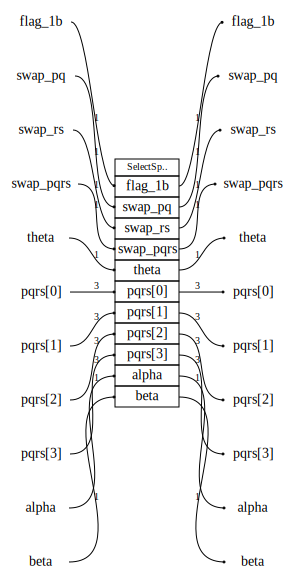

In [2]:
from qualtran.bloqs.chemistry.sparse import SelectSparse

bloq = SelectSparse(10)
show_bloq(bloq)

## `PrepareSparse`
Prepare oracle for the sparse chemistry Hamiltonian

Prepare the state:

$$
    |0\rangle|+\rangle|0\rangle|0\rangle
    \sum_{\sigma}\sum_{pq}
    \sqrt{\frac{T_{pq}'}{2\lambda}}
    |\theta_{pq}^T\rangle|pq\sigma\rangle|000\rangle
    +|1\rangle|+\rangle|+\rangle|+\rangle
    \sum_{\alpha\beta}
    \sum_{pqrs}
    \sqrt{\frac{\tilde{V}_{pqrs}'}{2\lambda}}
    |\theta_{pqrs}^V\rangle|pq\alpha\rangle|rs\beta\rangle
$$

#### Parameters
 - `num_spin_orb`: The number of spin orbitals.
 - `num_non_zero`: The number of non-zero matrix elements.
 - `num_bits_state_prep`: the number of bits of precision for state preparation. This will control the size of the keep register.
 - `num_bits_rot_aa`: The number of bits of precision for the single-qubit rotation for amplitude amplification during the uniform state preparataion. Default 8.
 - `adjoint`: Whether we are apply PREPARE or PREPARE^dag
 - `k`: qroam blocking factor. 

#### Registers
 - `pqrs`: the register to store the spatial orbital index.
 - `theta`: sign qubit.
 - `alpha`: spin for (pq) indicies.
 - `beta`: spin for (rs) indicies.
 - `swap_pq`: a |+> state to restore the symmetries of the p and q indices.
 - `swap_rs`: a |+> state to restore the symmetries of the r and s indices.
 - `swap_pqrs`: a |+> state to restore the symmetries of between (pq) and (rs).
 - `flag_1b`: a single qubit to flag whether the one-body Hamiltonian is to be applied or not during SELECT. 

Refererences:
    [Even More Efficient Quantum Computations of Chemistry Through Tensor
        hypercontraction](https://arxiv.org/abs/2011.03494) Eq. A11.

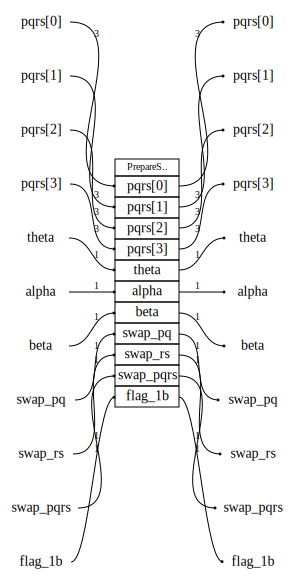

In [3]:
from qualtran.bloqs.chemistry.sparse import PrepareSparse

bloq = PrepareSparse(10, 1_000, 8)
show_bloq(bloq)